## Machine Learning
<h4>1. What is machine learning?</h>
<h4>2. Types of machine learning.</h>
<h4>3. What is supervised learning?</h>
<h4>4. Types of supervised learning. </h>
<h4>5. What is classification problem?</h>
<h4>6. What is regression problem?</h>
<h4>7. Definition of Cost Function.</h>
<h4>8. Optimization of Cost Function: Gradient Descent Method.</h>


<a id="1.-What-is-machine-learning?">1. What is machine learning ?</a><br>
Machine learning enables computers to make data-driven decisions rather than being explicitly programmed to do that. <br>
For example, we can train a model $ Y = h(X) $ to predict house price y based on the house age x.

<div> 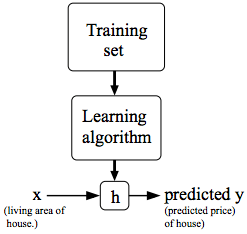 </div>

<a id="2.-Types-of-machine-learning.">2. Types of machine learning.</a><br>
The field of machine learning consists of supervised learning, unsupervised learning, and reinforcement learning.

<div> 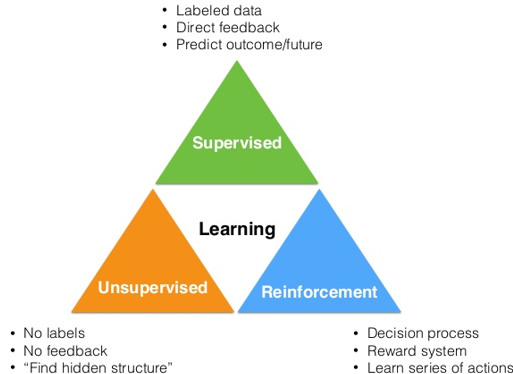 </div>

<a id="3.-What-is-supervised-learning?">3. What is supervised learning?</a><br>
Supervised learning is that you have input variables (X, which is also called features) and target output variable (Y, which is also called label) so that you use an machine learning algorithm to learn the mapping function (h) from the input to the output: $ Y = h(X) $

<a id="4.-Types-of-supervised-learning.-">4. Types of supervised learning.</a><br>
Supervised learning problems can be further grouped into classification and regression problems.

<a id="5.-What-is-classification-problem?">5. What is classification problem? </a><br>
A problem is about classification when a category is wanted as the output, such as "yes" or "no", "spam" and "not spam", and "apple" or "orange". <br>
Mathematically speaking, if we have a n-dimension space, in which (n-1)-dimensions are feature dimensions and 1-dimension is a label dimension, classification problem is about using a finite number of planes that split the n-dim space so that each segregation is homogenous in terms of label (one segregation, the same label).  <br>
For example, one line separates the following 3D space, which has two feature dimensions (size and color) and one label demension (fruit type).

<div> 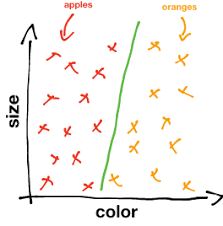 </div>

In [1]:
# A bad example
from  sklearn import tree
#features=[[140,"red"],[145,"red"],[170,"Yellow"],[180,"yellow"]]
features=[[140,1],[150,1],[170,0],[180,0]]
#labels=["apple","apple","orange","orange"]
labels=[1,1,0,0]
clf=tree.DecisionTreeClassifier()
clf=clf.fit(features,labels)
print(clf.predict([[160,1]]))

[1]


<a id="6.-What-is-regression-problem?">6. What is a regression problem?</a><br>
Mathematically speaking, if we have a collection of dots in a n-dimension space, regression problem is about finding a representative curve for all dots. <br>
For example, we want to find a line that represents all point in the following 2D space, in which x (horizontal) axis represents an independent feature while y (vertical) axis represents a dependent label.

<div> 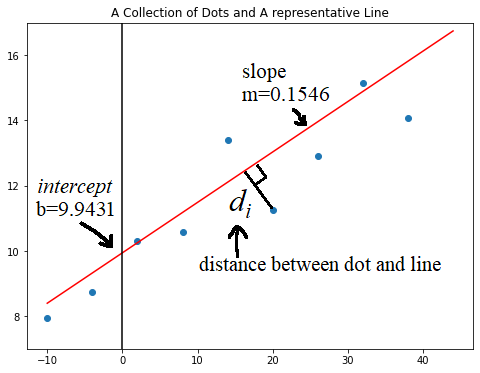 </div>

<a id="7.-Definition-of-Cost-Function.">7. Definition of Cost Function</a><br>
The red curve ($ h(x)=mx+b $) is representative because it is closest to n dots.<br>
In other words, the cost function (sum of squared distance) $ Cost(m, b)=\frac{1}{n}\sum\limits_{i=1}^n d_i^2$ (, in which $ d=\frac{|mx_i-y_i+b|}{\sqrt{m^2+1}} $) is at its minimum. <br>
BTW, it’s conventional to square the distance to ensure that it is positive and to make cost function differentiable. 

<a id="8.-Optimization-of-Cost-Function:-Gradient-Descent-Method.">8. Optimization of Cost Function: Gradient Descent Method.</a><br>
We can use <b><i>Gradient Descent</i></b> to minimize cost function.

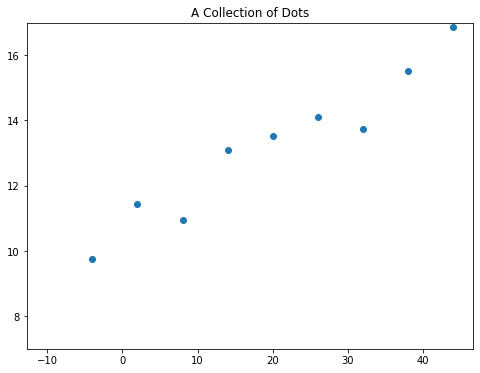

In [2]:
%matplotlib inline 
#notebook  
import numpy as np, matplotlib.pyplot as plt, warnings, numdifftools as nd
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 
np.random.seed(100) 
warnings.filterwarnings('ignore')  

X   = np.arange(-10, 50, 6)  
Y   = X*0.15+np.random.randn(10)+10
fig = plt.figure(figsize = (8,6))
ax  = fig.add_subplot(1,1,1)
ax.scatter(X, Y) 
#ax.plot(X,X*0.1546+9.9431, color='r')
#ax.plot([0,0],[6,20], color='k')
ax.set_ylim(7,17)
_ = plt.title('A Collection of Dots')

Let's draw the cost function $ Cost(m,b) =\frac{1}{n}\sum\limits_{i=1}^n d_i^2 = \frac{1}{n}\sum\limits_{i=1}^n\frac{(mx_i-y_i+b)^2}{m^2+1} $<br>
The red dot $(m, b, cost)_{min}$ on the bottom of cost surface is (0.1546, 9.9431, 0.6874). <br>

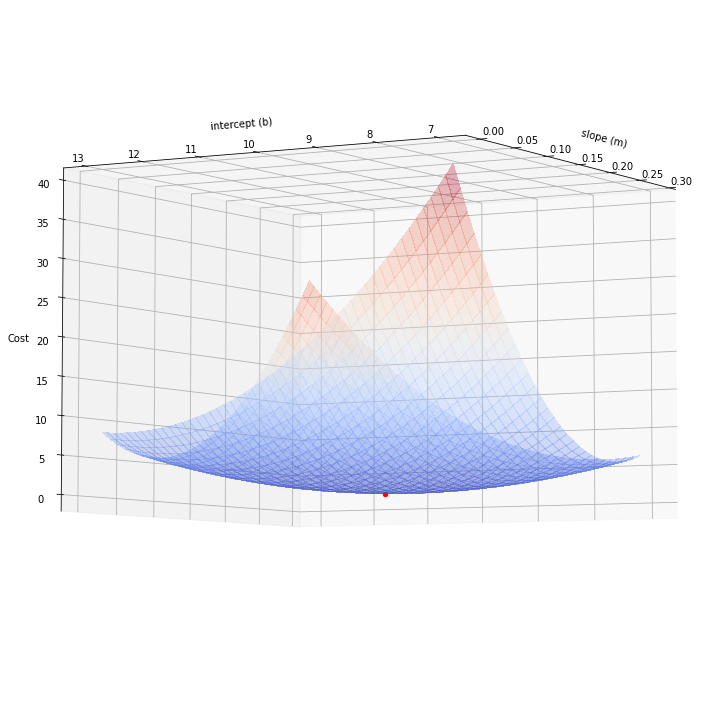

In [3]:
costFunc = lambda m, b: np.mean([(m*x-y+b)**2/(m*m+1) for x,y in zip(X, Y)]) 
 
M = np.arange(0, 0.3, 0.01) 
B = np.arange(7, 13, 0.03)  
z_obj = np.array([[costFunc(m,b) for m in M] for b in B]) 
M, B = np.meshgrid(M, B)

ax = plt.figure(figsize = (10,10)).add_subplot(111, projection=Axes3D.name) # get the current 3d axis, or it will be created  
ax.plot_surface(M, B, z_obj, cmap=cm.coolwarm, alpha=0.3,linewidth=0, antialiased=False) 
ax.scatter([0.1546], [9.9431], [costFunc(0.1546, 9.9431)], marker='o', color='r')
ax.view_init(-5,210)  
ax.set_xlabel('slope (m)')
ax.set_ylabel('intercept (b)')
ax.set_zlabel('Cost')
plt.tight_layout()
plt.show()

When we run gradient descent search, we will start from an arbitrary location on this surface and move downhill to find a better combination of m and b which gives a smaller cost value. <br>
The gradient guides the downhill direction and learning rate ($\alpha$) defines the step size of downhill move.<br>
Since cost function is defined by two parameters (m and b), we will need to compute a partial derivative for each. These derivatives work out to be: <br>
$ \frac{\partial Cost}{\partial m} = \frac{1}{n}\sum\limits_{i=1}^n \frac{2(mx_i-y_i+b)(x_i+my_i-mb)}{(m^2+1)^2} $ <br>
$ \frac{\partial Cost}{\partial b} = \frac{1}{n}\sum\limits_{i=1}^n \frac{2(mx_i-y_i+b)}{m^2+1} $ <br>

In [4]:
def Gradient(m, b): 
    dm = np.mean([2*(m*x-y+b)*(x+m*y-m*b)/(m*m+1)**2 for x,y in zip(X, Y)]) # the partial derivative of cost with respect to m 
    db = np.mean([2*(m*x-y+b)            /(m*m+1)    for x,y in zip(X, Y)]) # the partial derivative of cost with respect to b 
    return dm, db

Starting from an arbitrary point $ (m, b)_0 = (5, 5) $, we hope to find a new pair of $ (m, b)_1$ which gives us a lower value of $ Cost(m_i,b_i) $ after each iteration:<br>
$ (m, b) = (m, b)_{i-1}-\alpha*\nabla Cost $ <br>
The learning rate ($\alpha$) controls how large of a step we take downhill during each iteration. If we take too large of a step, we may step over the minimum. However, if we take small steps, it will require many iterations to arrive at the minimum. <br>
We are going to prove that wherever the beginning point on the cost surface. We always reach to the same bottom point (0.1546, 9.9431, 0.6874).<br>
In the end, we know a line with 0.1546 as the slope and 9.9431 as the intercept is the representative line. 

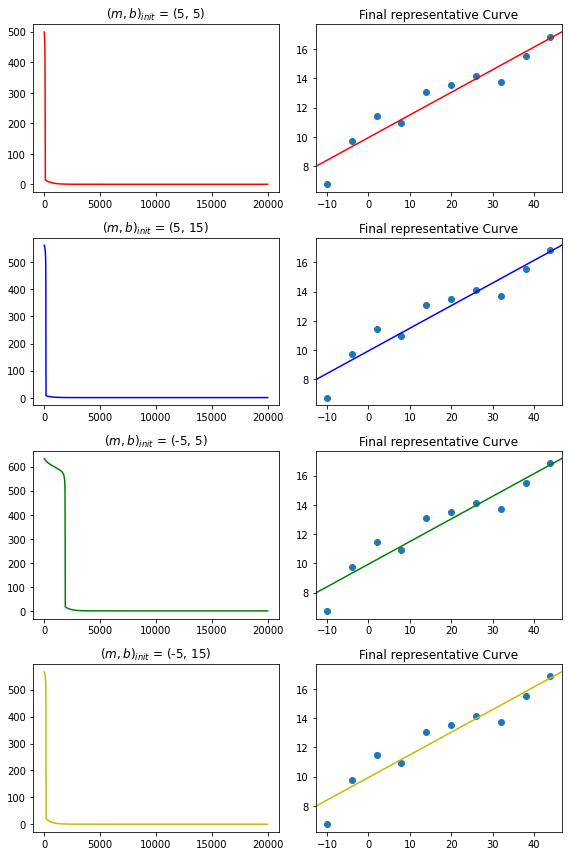

In [5]:
fig = plt.figure(figsize = (8,12))

# No matter where (m, b)0
for m, b, c, idx in [(5, 5, 'r', 1), (5, 15, 'b', 2), (-5, 5, 'g', 3), (-5, 15, 'y', 4)]: # # inital_m, inital_b   
    ax1 = fig.add_subplot(4,2,idx*2-1) 
    plt.title(fr'$(m, b)_{{init}}$ = ({m}, {b})')  
    iterations = 20000
    learning_rate = 0.001
    costs = [] 
    for i in range(iterations):
        dm, db = Gradient(m, b) 
        m -= dm*learning_rate
        b -= db*learning_rate
        costs.append(costFunc(m, b)) 
        
    _ = ax1.plot(range(iterations), costs, color=c) 
    m, b = np.around([m,b], 4)  
    
    ax2 = fig.add_subplot(4,2,idx*2) 
    ax2.scatter(X, Y)
    
    xlim = ax2.get_xlim()
    x = np.linspace(xlim[0], xlim[1], 100)
    y = m*x + b  
    #ax.plot(x,[0]*x, color='black') 
    #ax.plot([0]*y,y, color='black')
    ax2.plot(x,y, color=c)
    ax2.set_title('Final representative Curve')
    ax2.set_xlim(xlim[0], xlim[1]) 
plt.tight_layout()

In [6]:
_ = '''
https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

import base64
with open('download.png', "rb") as image_file: img_str = 'data:image/png;base64,' + base64.b64encode(image_file.read()).decode() 
a = """<div> <img src="{}" alt="Red dot" /> </div>""".format(img_str) 
print(a)
'''